In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
print('Number of rows',df.shape[0])
print('Number of Columns',df.shape[1])

Number of rows 200
Number of Columns 5


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:xlabel='Genre', ylabel='count'>

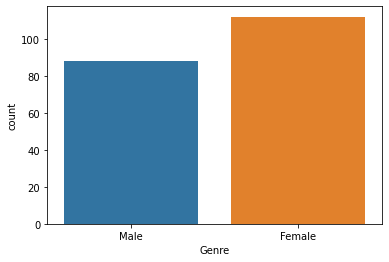

In [14]:
#EDA with Genre
sns.countplot(df['Genre'])


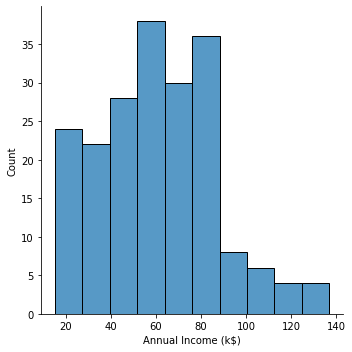

In [18]:
sns.displot(df['Annual Income (k$)'])

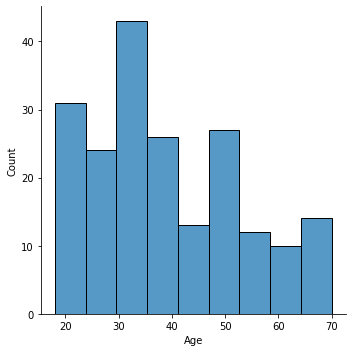

In [17]:
sns.displot(df['Age'])

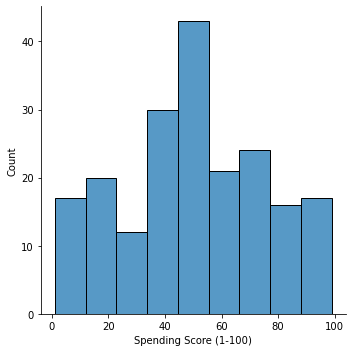

In [19]:
sns.displot(df['Spending Score (1-100)'])

<AxesSubplot:>

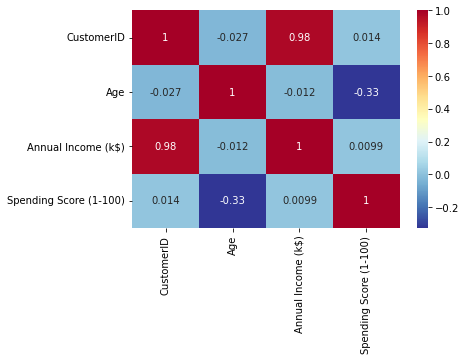

In [22]:
#Correlation Matrix
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='RdYlBu_r')

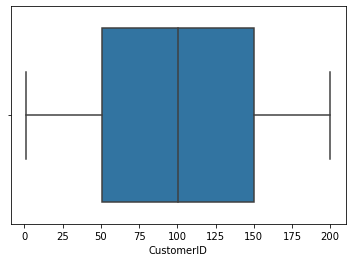

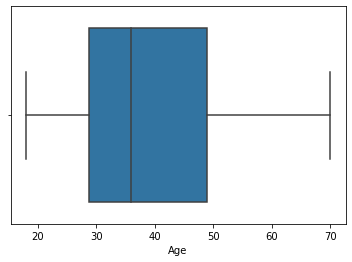

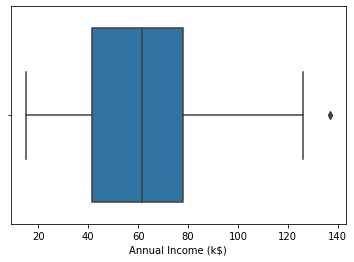

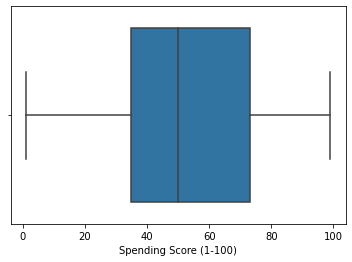

In [40]:
for i in df.select_dtypes(include=['int','float']):
    sns.boxplot(df[i])
    plt.show()

We can find only a small number of outliers so not need to remvoe it

In [24]:
#Kmeans Clustering

df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [26]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [33]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit_predict(x)

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [39]:
#By using elbow method  we can find the optimal number of clusters
a=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i) 
    kmeans.fit(x)
    a.append(kmeans.inertia_)
a    

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 24995.96978113596,
 21829.135638779822,
 19676.612585602805]

<module 'matplotlib.pyplot' from 'C:\\Users\\Jeevan Joyce\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

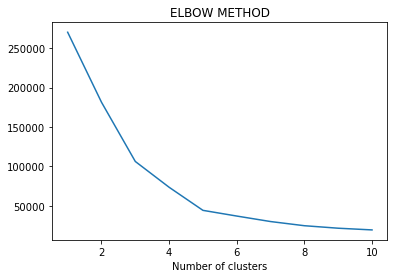

In [43]:
#Visulisation
plt.plot(range(1,11),a)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt
          

In [49]:
#Model Traninig
x=df[['Annual Income (k$)','Spending Score (1-100)']]
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(x)
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

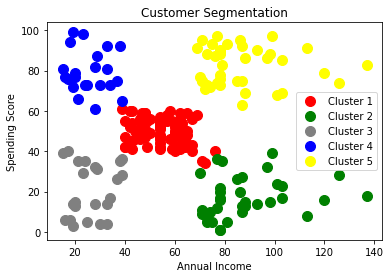

In [52]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c='grey',label='Cluster 3')
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c='yellow',label='Cluster 5')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
